# Importing required modules

In [126]:
import numpy as n
import pandas as p
import matplotlib.pyplot as ma
from sklearn.svm import SVC
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading the DataFile

In [103]:
data=p.read_csv('insurance.csv')

In [104]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [105]:
data.shape

(1338, 7)

# Checking whether there are any null values in the data

In [106]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Plotting a graph of the age column

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

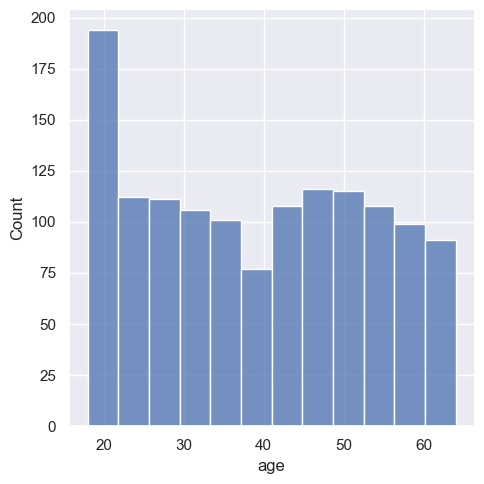

In [143]:
s.set()
ma.figure(figsize=(6,6))
s.displot(data['age'])


# Plotting the graph of the number of male and female

<Axes: xlabel='sex', ylabel='count'>

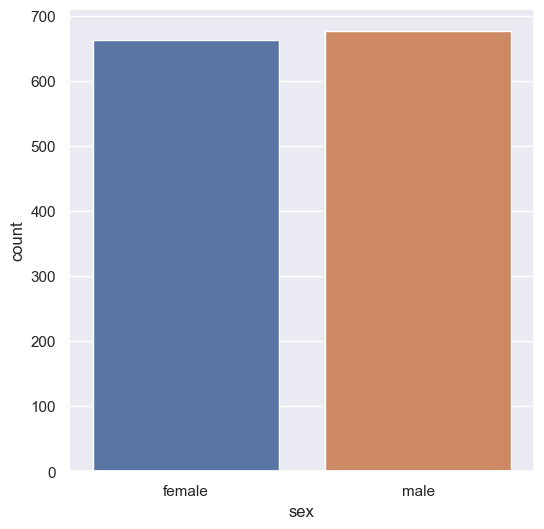

In [75]:
ma.figure(figsize=(6,6))
s.countplot(x="sex",data=data)


# Plotting a graph of the bmi column

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


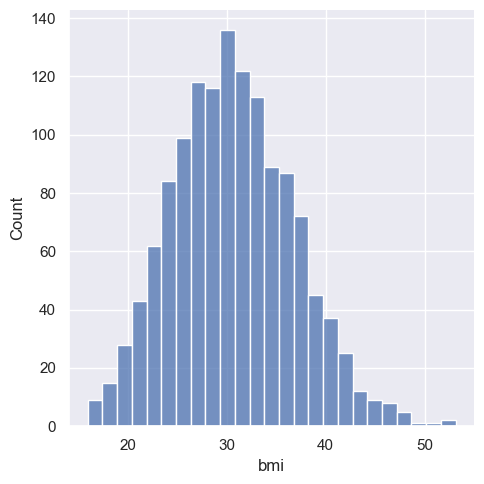

In [144]:
s.displot(data['bmi'])
ma.show()

In [111]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Replacing string values to numerical values as String values are not supported

In [112]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'no':0,'yes':1}},inplace=True)
data.replace({'region':{'southwest':1,'southeast':2,'northwest':3,'northeast':4}},inplace=True)

In [115]:
x=data.drop(columns='charges',axis=1)

In [116]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [117]:
y=data['charges']

In [118]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [120]:
x_train.shape

(1070, 6)

In [121]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# Checking the accuracy of the training test cases

In [132]:
training_dataprediction=reg.predict(x_train)
r2_train=metrics.r2_score(y_train,training_dataprediction)
r2_train

0.748559820126962

# Checking the accuracy of the testing test cases

In [133]:
test_dataprediction=reg.predict(x_test)
r2_test=metrics.r2_score(y_test,test_dataprediction)

r2_test

0.7562016818027102

# Using our own data to predict the cost

In [148]:
sample_data=(32,0,28.880,0,0,3)
sampledata_in_array=n.asarray(sample_data)
sampledata_reshaped=sampledata_in_array.reshape(1,-1)

In [149]:
sampledata_reshaped

array([[32.  ,  0.  , 28.88,  0.  ,  0.  ,  3.  ]])

In [150]:
prediction_of_cost=reg.predict(sampledata_reshaped)
print("The cost of Insurance for above sample data is",prediction_of_cost)

The cost of Insurance for above sample data is [5413.86822951]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
